In [12]:
import pandas as pd
df = pd.read_csv('/Users/neharajganesh/Desktop/Projects/NBAWinPredictions/data/final_data.csv')
print(df.head())


   Unnamed: 0  FG% Difference  3P% Difference  2P% Difference  FT% Difference  \
0           0          -0.024          -0.001           0.013          -0.001   
1           1           0.011          -0.011           0.017          -0.004   
2           2          -0.012          -0.006          -0.018          -0.015   
3           3           0.035           0.014           0.037          -0.012   
4           4           0.020           0.049           0.005           0.016   

   AST Difference  STL Difference  BLK Difference  PTS Difference  \
0            -1.4            -1.0             1.5             0.5   
1            -0.1            -0.3            -0.5            -0.9   
2            -2.8            -0.5            -0.2            -1.9   
3             4.4             1.9             0.8            13.1   
4             3.4            -0.8            -2.2             5.2   

   Age Difference  ...  Pace Difference  3PAr Difference  TS% Difference  \
0             1.4  ...

In [13]:
X = df.drop(columns=["Outcome"]) #keep all columns except the one we're predicting 
y = df["Outcome"]     


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80 % train, 20% test


In [15]:
from sklearn.preprocessing import StandardScaler
#normalizing input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#starting off with 64 neurons, then 32, then 1 
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid for binary classification at the end for win or lose
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


/Users/neharajganesh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

(23+1)*64 = 1,472 parameters 
from previous layer -> (64+1) * 32 = 2,080 parameters 
from previous layer -> (32+1) * 1 = 33 parameters 


In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5257 - loss: 0.7205 - val_accuracy: 0.6970 - val_loss: 0.5849
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5671 - val_accuracy: 0.7273 - val_loss: 0.5712
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7076 - loss: 0.5735 - val_accuracy: 0.7222 - val_loss: 0.5703
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7224 - loss: 0.5496 - val_accuracy: 0.6970 - val_loss: 0.5738
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7166 - loss: 0.5648 - val_accuracy: 0.7222 - val_loss: 0.5730
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7137 - loss: 0.5668 - val_accuracy: 0.7273 - val_loss: 0.5706
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.5560 - val_accuracy: 0.7172 - val_loss: 0.5730
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7191 - loss: 0.5524 - val_accuracy: 0.7020 - val_loss:

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5819 - loss: 0.8434 
Test accuracy: 0.59


In [19]:
#first ten predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")
print(predicted_classes[:10].flatten())


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 1 1 0 0 1 0 0 1 1]


In [20]:
model.save('nba_win_predictor.h5')


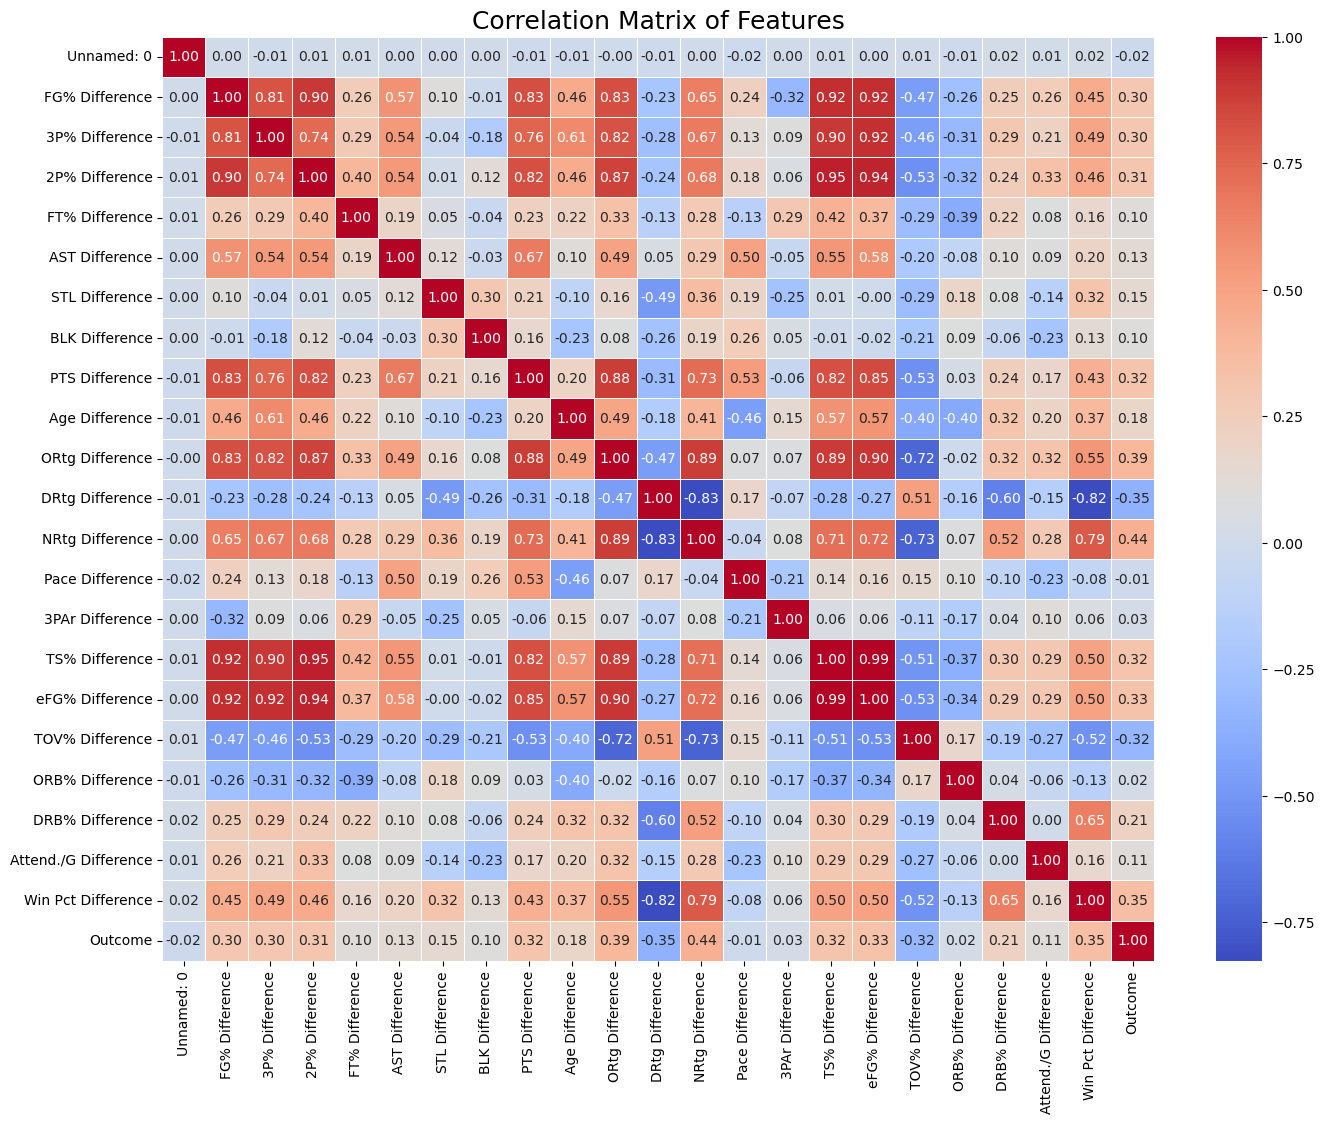

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns 
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr = df_numeric.corr()

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features", fontsize=18)
plt.show()


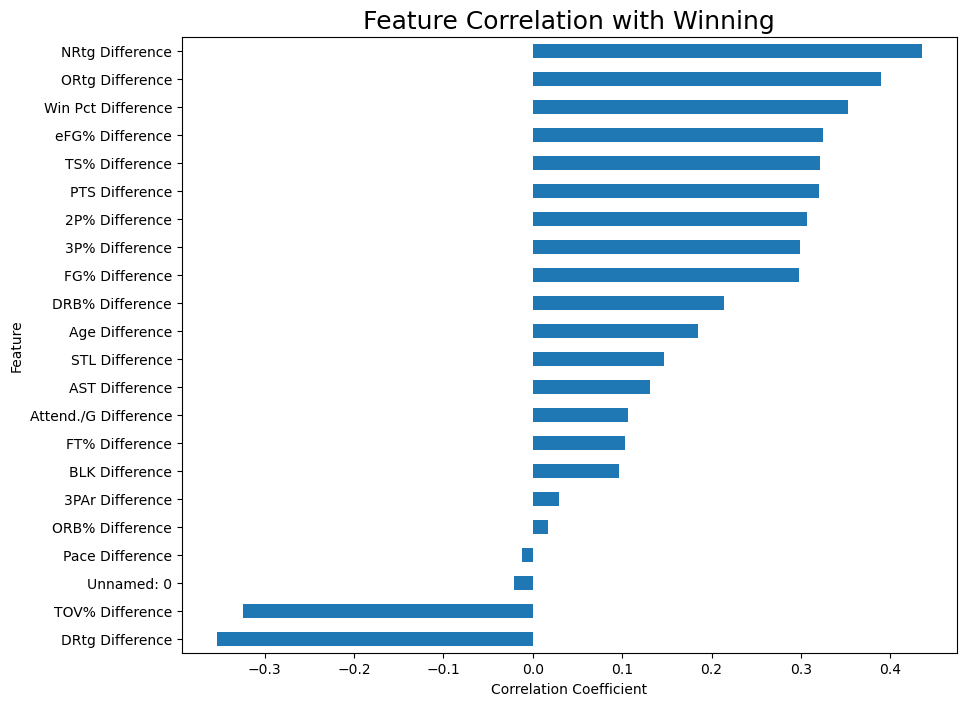

In [23]:
# Correlation of features with Result
corr_with_result = corr["Outcome"].drop("Outcome").sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
corr_with_result.plot(kind='barh')
plt.title('Feature Correlation with Winning', fontsize=18)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()
